In [23]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_colwidth', None)

# Create a data frame from our student CSV Data. 
df = pd.read_csv('Student_Data_Stripped.csv')

# print(df.head())

# Data Colums Meaning (Abreviations)
- NF (Know a student by name and or face)
- KOS (Know what "Kind of Student" they are)
- KSP (Know something personal about this student)
- PC (Have a personal connection with this student)

- Ci (Reslife)
- X (Learning Coaches)
- Ch (Faculty)
- T (Change from first assessment to second assessment

### All of these initial columns are the number of faculty, learning coaches and reslife that feel like they know this particular student at that level. 

# Cleaning and Organizing our Data

#### Not going to include triangles at this point because it is a change and we would be double counting these people. 

First we are going to run some calculations on our data frame and create new colums from what we have to make our analysis a bit easier. 

- Total our levels of knowability as we are not looking at individual constituancy groups at this time. 
- Create percentage columns of the total faculty, staff, and res life folks that know each student at various levels. 
- 

In [33]:



# Totaling the amount of people in each constituancy group.
df['NF_Total'] = df.NF_Ci + df.NF_X + df.NF_Ch
df['KOS_Total'] = df.KOS_Ci + df.KOS_X + df.KOS_Ch
df['KSP_Total'] = df.KSP_Ci + df.KSP_X + df.KSP_Ch
df['PC_Total'] = df.PC_Ci + df.PC_X + df.PC_Ch

# Need the numbers of faculty, learning coaches, and res life that completed the survey. 
# These values below are within one or two of the actual amounts. 
num_circle = 10
num_X = 13
num_check = 22
num_peeps = num_circle + num_X + num_check

# Created four colums with the percentage of faculty that know this particular student in each knowability category.
df['NF_Percentage'] = df.NF_Total / num_peeps * 100
df['KOS_Percentage'] = df.KOS_Total / num_peeps * 100
df['KSP_Percentage'] = df.KSP_Total / num_peeps * 100
df['PC_Percentage'] = df.PC_Total / num_peeps * 100

# print(df.head())


Now that we have percentage of faculty ect that know each student at various levels, I would like to see the range of percentages that we have to better group out data. 

Will now find the maximum and minimum percentages of each column. 

In [34]:
max_NF = df.NF_Percentage.max()
max_KOS = df.KOS_Percentage.max()
max_KSP = df.KSP_Percentage.max()
max_PC = df.PC_Percentage.max()

min_NF = df.NF_Percentage.min()
min_KOS = df.KOS_Percentage.min()
min_KSP = df.KSP_Percentage.min()
min_PC = df.PC_Percentage.min()

maxes = [max_NF, max_KOS, max_KSP, max_PC]
mins = [min_NF, min_KOS, min_KSP, min_PC]

labels = ['Name / Face', 'Kind of Student', 'Something Personal', 'Personal Conneciton']
for i in range(0,4):
   print('The maximum percentage for ' + labels[i] + ' is '  + str(round(maxes[i], 2))+'%') 

print('\n')

for i in range(0,4):
    print('The minimum percentage for ' + labels[i] + ' is '  + str(round(mins[i], 2))+'%')



The maximum percentage for Name / Face is 31.11%
The maximum percentage for Kind of Student is 20.0%
The maximum percentage for Something Personal is 31.11%
The maximum percentage for Personal Conneciton is 68.89%


The minimum percentage for Name / Face is 0.0%
The minimum percentage for Kind of Student is 0.0%
The minimum percentage for Something Personal is 0.0%
The minimum percentage for Personal Conneciton is 4.44%


# Looking into Day vs. Boarding Students and Faculty Connections with Them. 
Below we will be comparing the ammount of personal connections and other levels of knowing students, comparing boarding studetns vs. day students. 



In [16]:



# Make a new data frame pulling just the totals. 
# Using .copy() made it so there is not a chained indexing error message. This seems to be a cleaner way to do thigns. 
df_new = df[['First Name', 'Last Name', 'Grade', 'Dorm', 'NF_Total', 'KOS_Total', 'KSP_Total', 'PC_Total']].copy()
# print(df_new.sample(20))


df_new['Total_Marks'] = df['NF_Total'] + df['KOS_Total'] + df['KSP_Total'] + df['PC_Total']

df_new['NF_Percentage'] = df_new['NF_Total']/df_new['Total_Marks']
df_new['KOS_Percentage'] = df_new['KOS_Total']/df_new['Total_Marks']
df_new['KSP_Percentage'] = df_new['KSP_Total']/df_new['Total_Marks']
df_new['PC_Percentage'] = df_new['PC_Total']/df_new['Total_Marks']

# print(df_new[df_new['PC_Percentage'] < 0.3])


# Created a function to take a null value in dorm, replace it with zero, and create a new column for boarding vs. day students. 

df_new['Dorm'] = df_new['Dorm'].fillna("Day")
df_new['Boarding_Day'] = df_new['Dorm'].apply(lambda x: 'Day' if x == 'Day' else 'Boarding')


# Grouped boarding vs day students by percentage of their check marks in each category and took the average of boarding and day in each category. 

df_boarding_day_grouped = df_new.groupby('Boarding_Day').mean()
df_boarding_day_grouped = df_boarding_day_grouped[['NF_Percentage', 'KOS_Percentage', 'KSP_Percentage', 'PC_Percentage']].copy()

print(df_boarding_day_grouped)

              NF_Percentage  KOS_Percentage  KSP_Percentage  PC_Percentage
Boarding_Day                                                              
Boarding           0.292497        0.113953        0.194032       0.399518
Day                0.231028        0.100163        0.232357       0.436452


# Box Plot Showing


In [19]:

# # Showing a box plot of percentage of faculty that know various students.

# df.boxplot(column=['PC_Percentage','KSP_Percentage', 'KOS_Percentage', 'NF_Percentage'], figsize=(8,8))
# plt.xticks([1, 2, 3, 4], ['Personal Connection', 'Know Something Personal', 'Kind of Student', 'Name / Face'], rotation=30)
# plt.title("Boxplots Showing Spread of Percentages \n of Different Knowabilitys of Studetns")
# plt.tight_layout()
# plt.show()

What if I just make a histogram of total checks in each major bucket and see the different spreads. Why do we really need the percentages???

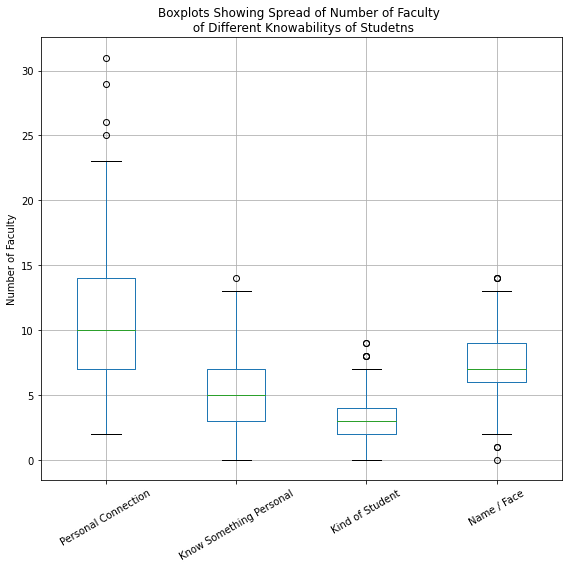

    First Name        Last Name  Grade  PC_Total
2       Andrik            Essey      8         3
3        Andre  Jarquin Partida      8         3
11    Savannah           Fuller      9         4
14       Yu An              Lin      9         3
17        Owen           Measom      9         5
33       Maika           Hammer     10         5
34     William             Hunt     10         5
49       Mateo         Peterson     10         4
52     Maxwell             Rife     10         3
55       Luise         Tenbosch     10         5
56        Yian             Tsai     10         5
57      Andrew        Twardecki     10         5
58        Reid            Upton     10         4
63       Wyatt           Walker     10         4
73       Willa           Conway     11         5
74      Joshua           Dabney     11         2
75      Isabel     Dobles Sosto     11         4
80       Kevin       Gunnarsson     11         4
81        Ryan            Hsieh     11         5
83      Keenan      

In [38]:

# Showing a box plot of the spread of number of faculty knowing studnets in these various facets. 

df.boxplot(column=['PC_Total','KSP_Total', 'KOS_Total', 'NF_Total'], figsize=(8,8))
plt.xticks([1, 2, 3, 4], ['Personal Connection', 'Know Something Personal', 'Kind of Student', 'Name / Face'], rotation=30)
plt.title("Boxplots Showing Spread of Number of Faculty \n of Different Knowabilitys of Studetns")
plt.ylabel("Number of Faculty")
plt.tight_layout()
plt.show()

lowest_PCs = df[df['PC_Total'] < 6]
lowest_PCs = lowest_PCs[['First Name', 'Last Name', "Grade", 'PC_Total']]

print(lowest_PCs)

I am going to make some histograms showing the value counts of number of faculty and staff knowing our students at various levels. 

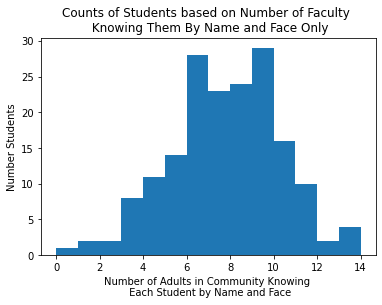

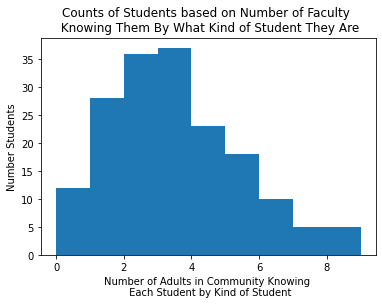

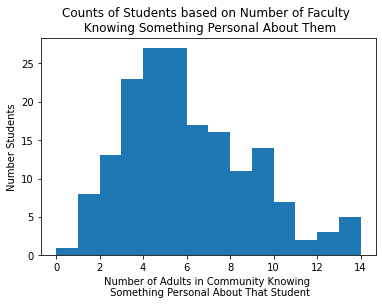

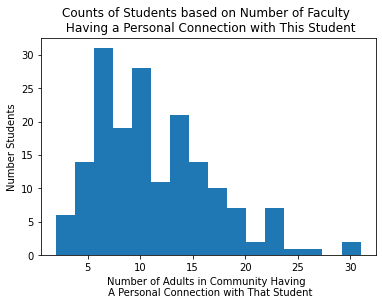

In [21]:

# Finding maximum values for number of faculty that know students at each level to be able to set range and bin size correctly. 

# print(df['NF_Total'].max())
# print(df['KOS_Total'].max())
# print(df['KSP_Total'].max())
# print(df['PC_Total'].max())


# Getting a list of values to be able to pull into a histogram. 
NF_Total_Values = df['NF_Total'].values
KOS_Total_Values = df['KOS_Total'].values
KSP_Total_Values = df['KSP_Total'].values
PC_Total_Values = df['PC_Total'].values


# Making histograms for each level of knowing our students. 
plt.hist(NF_Total_Values, bins=14)
plt.title('Counts of Students based on Number of Faculty \n Knowing Them By Name and Face Only')
plt.xlabel('Number of Adults in Community Knowing \n Each Student by Name and Face')
plt.ylabel('Number Students')
plt.show()
plt.hist(KOS_Total_Values, bins=9)
plt.title('Counts of Students based on Number of Faculty \n Knowing Them By What Kind of Student They Are')
plt.xlabel('Number of Adults in Community Knowing \n Each Student by Kind of Student')
plt.ylabel('Number Students')
plt.show()
plt.hist(KSP_Total_Values, bins=14)
plt.title('Counts of Students based on Number of Faculty \n Knowing Something Personal About Them')
plt.xlabel('Number of Adults in Community Knowing \n Something Personal About That Student')
plt.ylabel('Number Students')
plt.show()
plt.hist(PC_Total_Values, bins=16)
plt.title('Counts of Students based on Number of Faculty \n Having a Personal Connection with This Student')
plt.xlabel('Number of Adults in Community Having \n A Personal Connection with That Student')
plt.ylabel('Number Students')
plt.show()

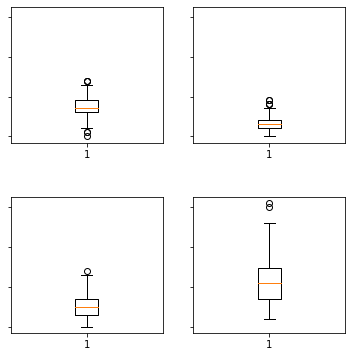

In [22]:
# Possible way to group the histograms in a series of four. 

# Not showing data. Need to look into this more. 

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharey=True)
axs[0, 0].boxplot(NF_Total_Values)

axs[0, 1].boxplot(KOS_Total_Values)

axs[1, 0].boxplot(KSP_Total_Values)

axs[1, 1].boxplot(PC_Total_Values)

for ax in axs.flatten():
    ax.set_yticklabels([])
    
fig.subplots_adjust(hspace=0.4)
plt.show()

Here I am just going to experiment a bit with counting and adding things up and see what happens. 